# Panels for draft Fig 1: Channel design and measurement principle

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
print("numpy v{}".format(np.__version__))
import matplotlib
print("matplotlib v{}".format(matplotlib.__version__))
print("pandas v{}".format(pd.__version__))
print("seaborn v{}".format(sns.__version__))
import lmfit
print("lmfit v{}".format(lmfit.__version__))

numpy v1.26.2
matplotlib v3.8.1
pandas v2.1.3
seaborn v0.13.0
lmfit v1.2.2


Versions 20231120 (python 3.11):
```
numpy v1.26.2
matplotlib v3.8.1
pandas v2.1.3
seaborn v0.13.0
lmfit v1.2.2
```

In [3]:
sns.plotting_context('paper')

{'axes.linewidth': 1.0,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.2000000000000002,
 'lines.markersize': 4.800000000000001,
 'patch.linewidth': 0.8,
 'xtick.major.width': 1.0,
 'ytick.major.width': 1.0,
 'xtick.minor.width': 0.8,
 'ytick.minor.width': 0.8,
 'xtick.major.size': 4.800000000000001,
 'ytick.major.size': 4.800000000000001,
 'xtick.minor.size': 3.2,
 'ytick.minor.size': 3.2,
 'font.size': 9.600000000000001,
 'axes.labelsize': 9.600000000000001,
 'axes.titlesize': 9.600000000000001,
 'xtick.labelsize': 8.8,
 'ytick.labelsize': 8.8,
 'legend.fontsize': 8.8,
 'legend.title_fontsize': 9.600000000000001}

In [4]:
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=0.65, rc={'grid.linewidth': 0.5})

In [5]:
def fsize_cm(size_x, size_y):
    """
    
    :param size_x: Figure width in inch
    :param size_y: Figure height in inch
    :return: tuple(width, height) in cm
    """
    return size_x / 2.54, size_y / 2.54

### Read in data

In [6]:
savepath = os.path.join("..\\data", "20230725_paa_beads", "20231120_paa_beads_all.tsv")

In [7]:
df_beads = pd.read_csv(savepath, sep='\t', index_col=0)

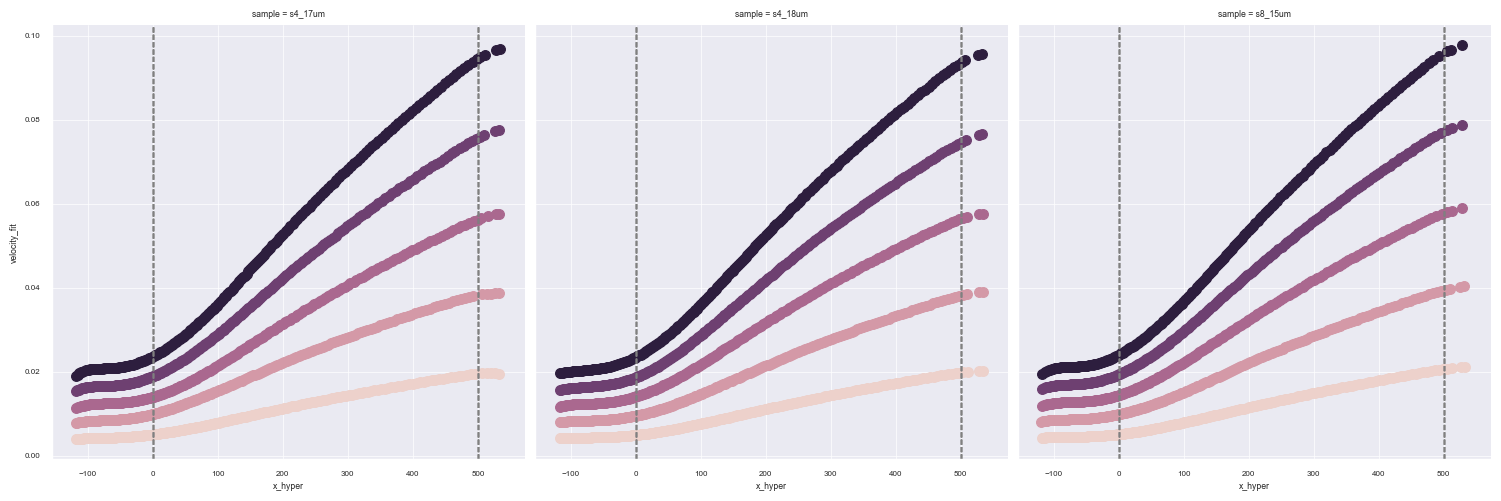

In [8]:
g = sns.lmplot(data=df_beads,
               x='x_hyper', y='velocity_fit', hue='flow_rate', palette='ch:',
               col='sample',  #col_wrap=5,
               x_bins=200, x_estimator=np.median, fit_reg=False, ci=None,
               facet_kws={'sharey': True,
                          'legend_out': False
                          }
               )
g.refline(x=0, color='gray', lw=1, ls='--', markersize=0, zorder=1)
g.refline(x=500, color='gray', lw=1, ls='--', markersize=0, zorder=1)
plt.show()

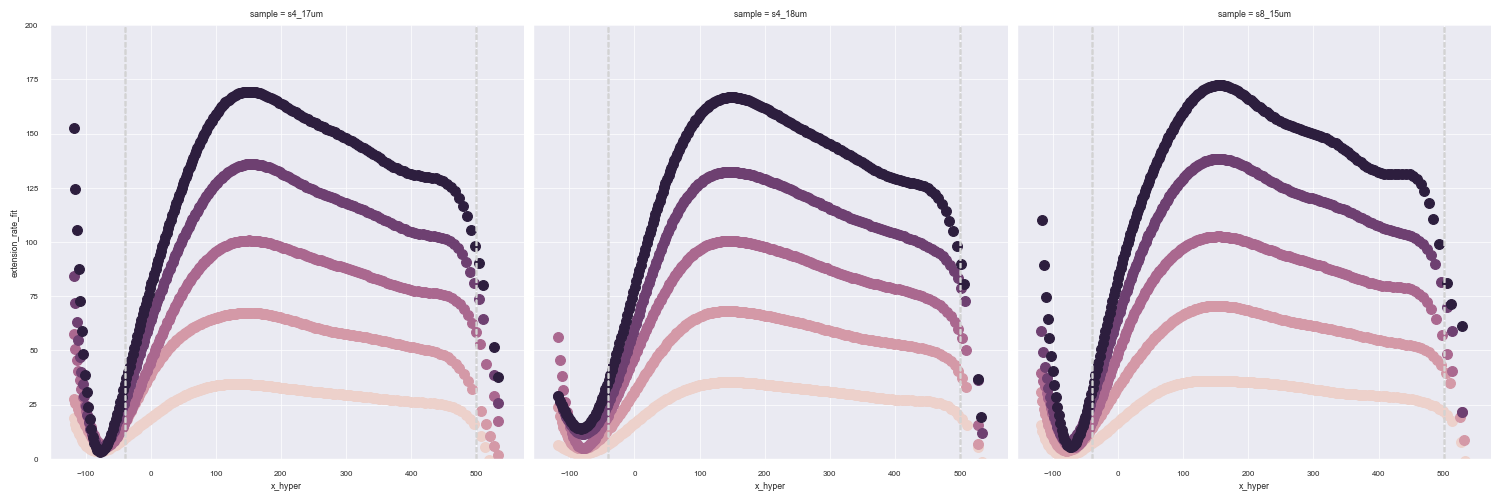

In [9]:
g = sns.lmplot(data=df_beads,
               x='x_hyper', y='extension_rate_fit', hue='flow_rate', palette='ch:',
               col='sample',  #col_wrap=5,
               x_bins=200, x_estimator=np.median, fit_reg=False, ci=None,
               facet_kws={'ylim': [0, 200],
                          'legend_out': False
                          }
               )
g.refline(x=-40, color='lightgray', lw=1, ls='--', markersize=0, zorder=1)
g.refline(x=500, color='lightgray', lw=1, ls='--', markersize=0, zorder=1)
plt.show()

##### only plot `s4_17um` at 0.02 µL/s

In [38]:
df_s4_17um_002 = df_beads.loc[(df_beads['sample'] == 's4_17um') & (df_beads['flow_rate'] == 0.02)].copy()

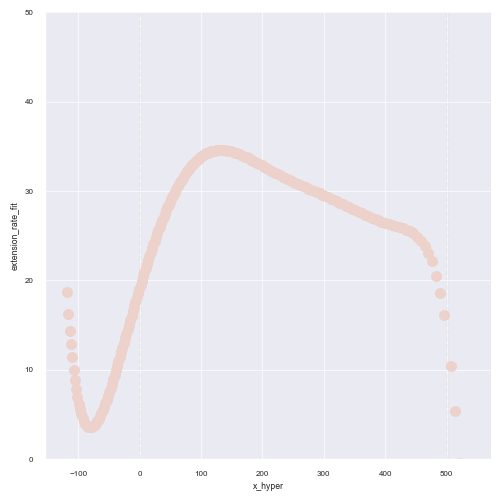

In [39]:
g = sns.lmplot(data=df_s4_17um_002,
               x='x_hyper', y='extension_rate_fit', hue='flow_rate', palette='ch:',
               x_bins=200, x_estimator=np.median, fit_reg=False, ci=None,
               facet_kws={'ylim': [0, 50],
                          'legend_out': False
                          }
               )
g.refline(x=0, color='lightgray', lw=1, ls='--', markersize=0, zorder=0)
g.refline(x=500, color='lightgray', lw=1, ls='--', markersize=0, zorder=0)
plt.show()

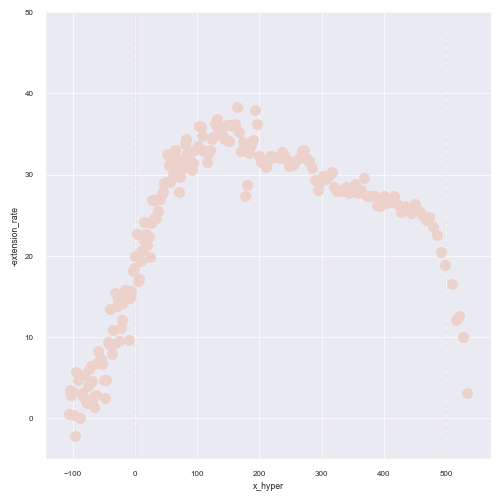

In [40]:
g = sns.lmplot(data=df_s4_17um_002,
               x='x_hyper', y='-extension_rate', hue='flow_rate', palette='ch:',
               x_bins=200, x_estimator=np.median, fit_reg=False, ci=None,
               facet_kws={'ylim': [-5, 50],
                          'legend_out': False
                          }
               )
g.refline(x=0, color='lightgray', lw=1, ls='--', markersize=0, zorder=0)
g.refline(x=500, color='lightgray', lw=1, ls='--', markersize=0, zorder=0)
plt.show()

##### Cut data into bins

In [41]:
time_feat = 'x_hyper'
x_0 = -80
idx_hyper = (x_0 < df_s4_17um_002['x_hyper']) \
            & (df_s4_17um_002['x_hyper'] < 530)

df_s4_17um_002_filtered = df_s4_17um_002.loc[idx_hyper].dropna()

bins = pd.cut(df_s4_17um_002_filtered[time_feat], 200)
df_grouped = df_s4_17um_002_filtered.groupby(by=['sample', 'flow_rate', bins],
                           as_index=False, observed=False,
                           )
df_median = df_grouped.median()
df_median.reset_index(inplace=True, drop=True)

In [42]:
df_median

sample  flow_rate  Unnamed: 0  area_msd  area_ratio     area_um  \
0    s4_17um       0.02     25137.0     338.0    1.037425  162.071210   
1    s4_17um       0.02     26012.0     337.5    1.037791  161.840010   
2    s4_17um       0.02     24387.0     337.5    1.039130  161.608810   
3    s4_17um       0.02     26100.0     338.0    1.037993  162.071210   
4    s4_17um       0.02     24389.0     335.5    1.037425  161.146410   
..       ...        ...         ...       ...         ...         ...   
195  s4_17um       0.02     27652.0     342.5    1.036023  163.920800   
196  s4_17um       0.02     28240.5     343.0    1.036539  164.152005   
197  s4_17um       0.02     29827.5     342.0    1.035979  163.689600   
198  s4_17um       0.02     22550.0     342.0    1.036603  164.383210   
199  s4_17um       0.02     24776.0     344.5    1.035765  165.076810   

       aspect  bright_avg  bright_sd      circ  ...     x_shift  velocity_fit  \
0    1.043478   130.12321   3.229631  0.989728  ...  -38.368835      0.004218   
1    1.000000   130.31854   3.187855  0.989763  ...  -35.454895      0.004228   
2    1.000000   130.36539   3.180118  0.989972  ...  -32.318420      0.004240   
3    1.000000   130.47879   3.231146  0.989774  ...  -29.342070      0.004252   
4    1.000000   130.51581   3.237568  0.989705  ...  -26.258910      0.004266   
..        ...         ...        ...       ...  ...         ...           ...   
195  1.045454   128.76814   3.230114  0.988954  ...  556.513700      0.019650   
196  1.045454   128.45407   3.202349  0.988675  ...  559.394950      0.019655   
197  1.045454   128.37816   3.275288  0.988770  ...  562.119350      0.019653   
198  1.045454   128.46419   3.431081  0.988645  ...  565.280760      0.019640   
199  1.045454   128.43503   3.507246  0.988605  ...  568.656100      0.019613   

     extension_rate_fit  time_shift  stress_ir  shear_stress_ir  \
0              3.560150   -0.008900   1.436547         1.140058   
1              3.682760   -0.008210   1.526231         1.212258   
2              3.907964   -0.007469   1.618798         1.276959   
3              4.200543   -0.006768   1.730837         1.346605   
4              4.574694   -0.006044   1.838752         1.406523   
..                  ...         ...        ...              ...   
195            3.116790    0.055744  14.531889        14.249704   
196            0.412418    0.055891  14.343754        14.313053   
197           -2.392747    0.056030  14.367903        14.367903   
198           -5.975170    0.056191  14.446239        14.446239   
199          -10.221755    0.056363  14.520475        14.520475   

     normal_stress_ir  stress_ell  shear_stress_ell  normal_stress_ell  
0            0.297203    1.184236          0.523845           0.661706  
1            0.312887    1.216276          0.523845           0.690451  
2            0.342403    1.268893          0.523845           0.743886  
3            0.382085    1.339966          0.523845           0.814489  
4            0.434952    1.429181          0.523845           0.906619  
..                ...         ...               ...                ...  
195          0.242844   10.340895          9.671996           0.559917  
196          0.011258    9.895080          9.722917           0.044164  
197          0.000000    9.767007          9.767007           0.000000  
198          0.000000    9.829975          9.829975           0.000000  
199          0.000000    9.889647          9.889647           0.000000  

[200 rows x 63 columns]

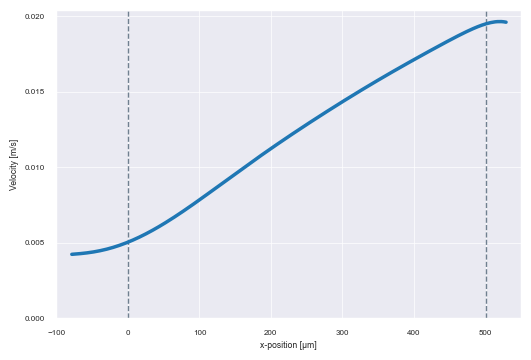

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

ax.plot(df_median['x_hyper'], df_median['velocity_fit'], 
        lw=2.5, zorder=3)

ax.axvline(0, color='slategray', ls='--', lw=1, zorder=1)
ax.axvline(500, color='slategray', ls='--', lw=1, zorder=1)

ax.set_xlim(-100, 550)
ax.set_ylim(0)
ax.set_yticks([0, 0.005, 0.01, 0.015, 0.02])

ax.set_xlabel("x-position [µm]")
ax.set_ylabel("Velocity [m/s]")

plt.show()

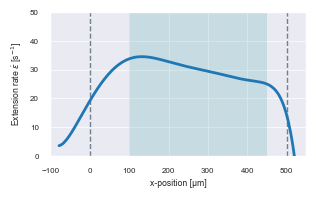

In [44]:
fsize = fsize_cm(8,5)
fig, ax = plt.subplots(1, 1, figsize=fsize)

ax.plot(df_median['x_hyper'], df_median['extension_rate_fit'],
        lw=2, zorder=3)

ax.axvline(0, color='slategray', ls='--', lw=1, zorder=1)
ax.axvline(500, color='slategray', ls='--', lw=1, zorder=1)

ax.set_xlim(-100, 550)
ax.set_ylim(0, 50)

# shaded area to highlight the zone of constant extension rate
ax.fill_between([100, 450], [50, 50], color='darkcyan', alpha=0.15, lw=0)

ax.set_xlabel("x-position [µm]")
ax.set_ylabel(r"Extension rate $\dot\varepsilon$ [s$^{-1}$]")

plt.tight_layout()
plt.show()

save_path = "..\\figure_plots\\fig1_extension_rate.pdf"
fig.savefig(save_path, format='pdf', dpi=900, 
            bbox_inches='tight', pad_inches=fsize[0] / 50
            )

Plot velocity trajectories of all objects

In [45]:
def centerline_velocity_theo(x, flow_rate, height, wc, wu, lc):
    hh = 0.63 * height
    A = 1 / lc * (1 / (hh - wu) - 1 / (hh - wc))
    wx = hh - 1 / (A * x + 1 / (hh - wc))
    return 3/2 * flow_rate / (height * (wx - hh))

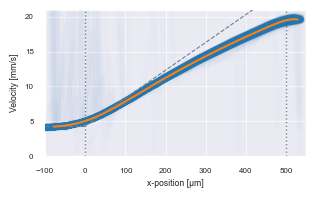

In [54]:
fig, ax = plt.subplots(1, 1, figsize=fsize_cm(8,5))

df_s4_17um_002['velocity [mm/s]'] = df_s4_17um_002['-velocity'] *1e3
sns.lineplot(data=df_s4_17um_002, x='x_hyper', y='velocity [mm/s]', 
             units='object_number', estimator=None,
             lw=4, alpha=0.01, zorder=3, ax=ax)

ax.plot(df_median['x_hyper'], df_median['velocity_fit'] * 1000, 
        color='tab:orange', ls='-', lw=1.5, zorder=4)

# plot theoretical velocity curve
flow_rate = 0.02  # mm^3 / s
channel_height = 30 *1e-3  # mm
wc = 60 *1e-3   # mm
wu = 250 *1e-3  # mm
lc = 500 *1e-3  # mm
xx = np.linspace(0, lc, 100)
centerline_velocity_th = centerline_velocity_theo(xx, flow_rate, 
                                                  channel_height, wc, wu, lc)
ax.plot(xx *1e3, centerline_velocity_th[::-1], '--', c='slategray', 
        lw=0.8, zorder=3)
ax.hlines(centerline_velocity_th[-1], -100, 0, ls='--', color='slategray',
          lw=0.8, zorder=3)

ax.axvline(0, color='gray', ls=':', lw=1, zorder=1)
ax.axvline(500, color='gray', ls=':', lw=1, zorder=1)

ax.set_xlim(-100, 550)
ax.set_ylim(0, 21)
ax.set_yticks([0, 5, 10, 15, 20])

ax.set_xlabel("x-position [µm]")
ax.set_ylabel("Velocity [mm/s]")

plt.tight_layout()
plt.show()

save_path = "..\\figure_plots\\fig1_velocity.pdf"
fig.savefig(save_path, format='pdf', dpi=900,
            bbox_inches='tight', pad_inches=fsize[0] / 50
            )